<a href="https://colab.research.google.com/github/forhigh/deeplearning_undergrad/blob/main/%5Bcomplete%5Dlab_07_5_FieldCompaction_ValidationDataset_SaveLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab_07_5 Deep Neural Nets
Field Compaction of Open-Graded Aggregates Validation Dataset
Save Model Loss

환경 준비

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 결과 저장을 위한 함수 호출
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

데이터 준비, 정규화, Training/Testing 데이터셋 구분

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Data_set = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/FieldCompaction1.csv", delimiter=',', dtype=np.float32)
X = Data_set[:, 0:2]
Y = Data_set[:, 2:5]

# Normalize input dataset X
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Split dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


딥러닝 모델 구조 설정

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=2, activation='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                90        
                                                                 
 dense_1 (Dense)             (None, 3)                 93        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


모델 컴파일, 저장 설정, 실행, 결과 출력

In [4]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# 모델 실행 결과 저장 조건 설정
modelpath="/content/gdrive/My Drive/Colab Notebooks/Checkpoint/{epoch:02d}-{val_mean_squared_error:.4f}.hdf5"
# modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history=model.fit(X_train, Y_train, epochs=5000, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer]) # checkpoint 콜백 적용

score = model.evaluate(X_test, Y_test)
print('Test Loss:', score)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Epoch 2502: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2502-126.9139.hdf5

Epoch 2503: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2503-126.8274.hdf5

Epoch 2504: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2504-126.7407.hdf5

Epoch 2505: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2505-126.6538.hdf5

Epoch 2506: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2506-126.5669.hdf5

Epoch 2507: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2507-126.4798.hdf5

Epoch 2508: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2508-126.3926.hdf5

Epoch 2509: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2509-126.3054.hdf5

Epoch 2510: saving model to /content/gdrive/My Drive/Colab Notebooks/Checkpoint/2510-126.2181.hdf5

Epoch 2511: saving model to /content/gdrive/My Drive/Colab Note

테스트 결과 출력

In [5]:
score=model.evaluate(X_test, Y_test)
print('Test Loss:', score)

1/1 [==============================] - 0s 31ms/step - loss: 90.5414 - mean_squared_error: 90.5414
Test Loss: [90.54142761230469, 90.54142761230469]


history에 저장된 학습 결과 확인


In [6]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,5242.568848,5242.568848,5270.006836,5270.006836
1,5241.445312,5241.445312,5268.909180,5268.909180
2,5240.320312,5240.320312,5267.811523,5267.811523
3,5239.195312,5239.195312,5266.713379,5266.713379
4,5238.069824,5238.069824,5265.615234,5265.615234
...,...,...,...,...
4995,146.709534,146.709534,51.879555,51.879555
4996,146.703888,146.703888,51.879494,51.879494
4997,146.698303,146.698303,51.880383,51.880383
4998,146.692505,146.692505,51.882130,51.882130


모델 실행 결과 그래프 표시

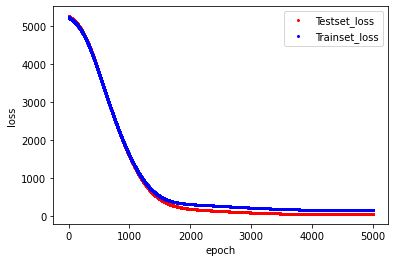

In [7]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()